In [0]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import keras.layers as layers
import numpy as np
from keras.models import load_model
import cv2

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive/')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 730, in _input_request
    ident, reply = self.session.recv(self.stdin_socket, 0)
  File "/usr/local/lib/python3.6/dist-packages/jupyter_client/session.py", line 803, in recv
    msg_list = socket.recv_multipart(mode, copy=copy)
  File "/usr/local/lib/python3.6/dist-packages/zmq/sugar/socket.py", line 466, in recv_multipart
    parts = [self.recv(flags, copy=copy, track=track)]
  File "zmq/backend/cython/socket.pyx", line 790, in zmq.backend.cython.socket.Socket.recv
  File "zmq/backend/cython/socket.pyx", line 826, in zmq.backend.cython.socket.Socket.recv
  File "zmq/backend/cython/socket.pyx", line 188, in zmq.backend.cython.socket._recv_copy
  File "zmq/backend/cython/checkrc.pxd", line 12, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/li

TypeError: ignored

In [0]:
cd ..

/content/drive/My Drive


In [0]:
%cd ./AML_Project/Images/Training/

/content/drive/My Drive/AML_Project/Images/Training


In [0]:
trdata = ImageDataGenerator(rescale=1./255,horizontal_flip=True)
traindata = trdata.flow_from_directory(directory="/content/drive/My Drive/AML_Project/Images/Training/",class_mode='categorical',target_size=(224,224),shuffle=True)
%cd ..
tsdata = ImageDataGenerator(rescale=1./255,horizontal_flip=True)
testdata = tsdata.flow_from_directory(directory="/content/drive/My Drive/AML_Project/Images/Validation/",class_mode='categorical', target_size=(224,224),shuffle=True)

Found 30951 images belonging to 3 classes.
/content/drive/My Drive/AML_Project/Images
Found 4655 images belonging to 3 classes.


In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(Dropout(0.2))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [0]:
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [0]:
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(units=2048,activation="relu"))
model.add(Dense(units=2048,activation="relu"))

In [0]:
model.add(Dense(units=3, activation="softmax"))

In [0]:
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)      

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=3, verbose=1, mode='auto')

In [0]:
hist = model.fit_generator(steps_per_epoch=50,generator=traindata, validation_data= testdata, validation_steps=10,epochs=100,callbacks=[checkpoint,early])
#saved_model=saved_model = load_model("vgg16_1.h5")




Epoch 1/100





50/50 [==============================] - 788s 16s/step - loss: 0.7060 - acc: 0.6800 - val_loss: 0.3091 - val_acc: 0.8969

Epoch 00001: val_acc improved from -inf to 0.89687, saving model to vgg16_1.h5
Epoch 2/100
50/50 [==============================] - 780s 16s/step - loss: 0.2286 - acc: 0.9319 - val_loss: 0.1916 - val_acc: 0.9250

Epoch 00002: val_acc improved from 0.89687 to 0.92500, saving model to vgg16_1.h5
Epoch 3/100
50/50 [==============================] - 785s 16s/step - loss: 0.1877 - acc: 0.9431 - val_loss: 0.3453 - val_acc: 0.9062

Epoch 00003: val_acc did not improve from 0.92500
Epoch 4/100
50/50 [==============================] - 803s 16s/step - loss: 0.1708 - acc: 0.9513 - val_loss: 0.2279 - val_acc: 0.9344

Epoch 00004: val_acc improved from 0.92500 to 0.93437, saving model to vgg16_1.h5
Epoch 5/100
50/50 [==============================] - 772s 15s/step - loss: 0.1033 - acc: 0.9688 - val_loss: 0.1076 - val_acc: 0.9625

Epoch 00005: val_acc improved

In [0]:
history_dict = hist.history

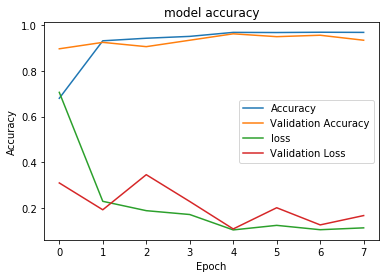

In [0]:
import matplotlib.pyplot as plt
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [0]:
%cd ..

/content/drive/My Drive/AML_Project/Images


In [0]:
%cd ./content/drive/My Drive/AML_Project/Images/Training

/content/drive/My Drive/AML_Project/Images/Training


In [0]:
saved_model = load_model("vgg16_1.h5")

In [0]:
cd ..

/content/drive/My Drive/AML_Project


In [0]:
%cd ./Test/

/content/drive/My Drive/AML_Project/Test


In [0]:
from keras.preprocessing import image
from imutils import paths

testPaths = list(paths.list_images('/content/drive/My Drive/AML_Project/Test/'))
True_Memes=0
False_Memes=0

for memes in range(1,501):
    j=str(memes)
    # image = cv2.imread(path)
    img = image.load_img(j+".jpg",target_size=(224,224))
    img = np.asarray(img)
    img = np.expand_dims(img, axis=0)    
    output = saved_model.predict(img)
    #print (output)
    out=np.argmax(output)
    if out==1:
        True_Memes+=1
    
    else:
        False_Memes+=1
Meme_accuracy= True_Memes/500
print("Out of 500 Memes in the Dataset",True_Memes,"are correctly classified!")
print("Model was",Meme_accuracy*100,"% accurate in identifying memes.")

True_Humans=0
False_Humans=0
for humans in range(501,1001):
    k=str(humans)
    # image = cv2.imread(path)
    img1 = image.load_img(k+".jpg",target_size=(224,224))
    img1 = np.asarray(img1)
    img1 = np.expand_dims(img1, axis=0)    
    output1 = saved_model.predict(img1)
    #print (output1)
    out1=np.argmax(output1)
    #print(out1)
    if out1==0:
        True_Humans+=1
    
    else:
        False_Humans+=1
Human_accuracy= True_Humans/500
print("Out of 500 Human images in the Dataset",True_Humans,"are correctly classified!")
print("Model was",Human_accuracy*100,"% accurate in identifying Humans.")


# True_Text=0
# False_Text=0
# for text in range(1001,1501):
#     l=str(text)
#     # image = cv2.imread(path)
#     img2 = image.load_img(l+".jpg",target_size=(224,224))
#     img2 = np.asarray(img2)
#     img2 = np.expand_dims(img2, axis=0)    
#     output2 = saved_model.predict(img2)
#     #print (output1)
#     out2=np.argmax(output2)
#     #print(out)
#     if out2==2:
#         True_Text+=1
#     else:
#         False_Text+=1
# Text_accuracy= True_Text/500
# print("Out of 500 Human images in the Dataset",True_Text,"are correctly classified!")
# print("Model was",Text_accuracy*100,"% accurate in identifying Text.")

Out of 500 Memes in the Dataset 480 are correctly classified!
Model was 96.0 % accurate in identifying memes.
1
2
1
1
1
2
1
1
1
1
1
2
2
2
2
1
2
1
2
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
0
2
1
2
1
2
0
2
1
1
1
1
2
1
1
1
1
2
2
1
2
1
2
2
1
1
1
1
1
2
0
1
1
2
1
1
1
2
2
1
1
1
2
1
1
1
1
1
2
1
0
1
2
1
1
2
2
0
1
2
1
2
1
1
1
2
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
0
1
1
1
1
2
0
1
2
1
1
1
1
1
1
1
1
1
0
1
2
0
2
2
1
1
0
1
0
1
2
2
1
2
2
1
1
1
1
1
1
0
1
1
1
1
1
2
1
1
2
1
1
1
2
1
1
0
2
2
2
2
1
2
1
1
1
1
1
1
1
1
2
1
1
2
1
1
0
1
1
0
1
1
1
1
0
1
1
1
1
2
1
1
1
1
1
1
2
0
1
1
1
1
1
1
0
1
2
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
2
1
0
1
1
1
2
1
1
0
1
2
1
1
1
1
0
1
1
1
2
0
2
2
1
2
1
1
1
1
1
2
2
0
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
0
0
0
1
2
1
1
2
1
1
1
2
2
1
2
1
1
2
1
1
1
2
1
1
2
1
2
1
2
1
1
1
1
1
2
1
1
1
0
2
2
1
1
2
1
1
2
2
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
2
1
2
1
2
1
1
1
0
1
1
1
2
1
1
1
1
1
2
1
2
1
2
1
1
1
1
1
2
1
1
2
1
1
1
1
2
1
1
0
1
0
0
2
1
1
1


In [0]:
cd ..

/content/drive/My Drive/AML_Project


In [0]:
Meme_accuracy


0.976

In [0]:
count=0
for i in range(100):
  if (ops[i]=="meme"):
    count+=1

In [0]:
count

100